# Dependencies


In [3]:
!pip install torch==1.8.2+cpu torchvision==0.9.2+cpu torchaudio===0.8.2 -f https://download.pytorch.org/whl/lts/1.8/torch_lts.html

Looking in links: https://download.pytorch.org/whl/lts/1.8/torch_lts.html


In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [6]:
!cd yolov5 & pip install -r requirements.txt

In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Model


In [3]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Danny/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-4-15 torch 1.8.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.5 GFLOPs
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
           

# Image Detections

In [5]:
img = 'https://www.skigranitepeak.com/wp-content/uploads/bb-plugin/cache/awesome_trio2-panorama.jpg'

In [6]:
results = model(img)
results.print()

image 1/1: 809x1619 3 persons, 2 skiss, 1 snowboard
Speed: 817.7ms pre-process, 169.3ms inference, 15.6ms NMS per image at shape (1, 3, 320, 640)


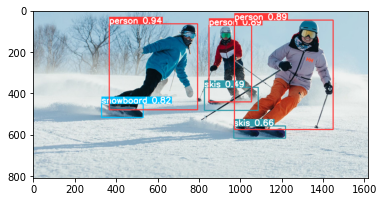

In [7]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Video Detections

In [8]:
cap = cv2.VideoCapture('driving.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    
    
    
    results = model(frame)
    
    cv2.imshow('Object Detection', np.squeeze(results.render()))
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Webcam Detection


In [88]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow('Object Detection', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

# Train Custom Model

In [9]:
import uuid #used to name images
import os #file paths
import time #break between image collection

In [10]:
IMAGES_PATH = os.path.join('data', 'images') #Setting image path: data/images 
labels = ['no mask', 'mask']
number_images = 20

In [16]:
cap = cv2.VideoCapture(0)

#label loop
for label in labels:
    print("Collecting images for {}".format(label))
    time.sleep(5)
    
    #image loop
    for img_num in range(number_images):
        print("Collecting images for {}, image number {}".format(label, img_num))
        
        ret, frame = cap.read()
        
        #sets the location and format of image
        image_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        #writes the current webcam frame into image_name which contains path and format
        cv2.imwrite(image_name, frame)
        
        #shows image
        cv2.imshow('Image Collection', frame)
        
        #allows delay to reposition for next image capture
        time.sleep(2)

        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

In [142]:
for label in labels:
    print("Collecting images for {}".format(label))
    for img_num in range(number_images):
        print("Collecting images for {}, image number {}".format(label, img_num))
        image_name = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        print(image_name)

data\images\no mask.5a9a9153-bd32-11ec-ab86-04d9f5803693.jpg
data\images\no mask.5a9a9154-bd32-11ec-b966-04d9f5803693.jpg
data\images\no mask.5a9a9155-bd32-11ec-8c3a-04d9f5803693.jpg
data\images\no mask.5a9a9156-bd32-11ec-82e1-04d9f5803693.jpg
data\images\no mask.5a9a9157-bd32-11ec-8abc-04d9f5803693.jpg
data\images\no mask.5a9a9158-bd32-11ec-bb73-04d9f5803693.jpg
data\images\no mask.5a9a9159-bd32-11ec-ab6d-04d9f5803693.jpg
data\images\no mask.5a9a915a-bd32-11ec-9eb4-04d9f5803693.jpg
data\images\no mask.5a9a915b-bd32-11ec-8b4a-04d9f5803693.jpg
data\images\no mask.5a9a915c-bd32-11ec-9866-04d9f5803693.jpg
data\images\no mask.5a9a915d-bd32-11ec-949e-04d9f5803693.jpg
data\images\no mask.5a9ab868-bd32-11ec-85e2-04d9f5803693.jpg
data\images\no mask.5a9ab869-bd32-11ec-ba7a-04d9f5803693.jpg
data\images\no mask.5a9ab86a-bd32-11ec-9b30-04d9f5803693.jpg
data\images\no mask.5a9ab86b-bd32-11ec-b298-04d9f5803693.jpg
data\images\no mask.5a9ab86c-bd32-11ec-9f00-04d9f5803693.jpg
data\images\no mask.5a9a

### LabelImg used to label pictures taken

In [17]:
!git clone https://github.com/tzutalin/labelImg

Cloning into 'labelImg'...


In [45]:
#Steps are below to get labelImg running

#created a virtual environment
!python -m venv venv 

In [ ]:
#Activated virtual environment
!venv\Scripts\Activate.bat

In [27]:
!pip install PyQt5 lxml

  Using cached pipenv-2022.4.8-py2.py3-none-any.whl (3.6 MB)
  Using cached virtualenv_clone-0.5.7-py3-none-any.whl (6.6 kB)
  Using cached virtualenv-20.14.1-py2.py3-none-any.whl (8.8 MB)
  Using cached distlib-0.3.4-py2.py3-none-any.whl (461 kB)
  Using cached platformdirs-2.5.1-py3-none-any.whl (14 kB)


In [ ]:
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc 

In [ ]:
!python labelImg.py

In [46]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 5 --data dataset.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=5, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
Traceback (most recent call last):
  File "C:\Users\Danny\Desktop\object-detection\yolov5\train.py", line 667, in <module>
    main(opt)
  File "C:\Users\Danny\Desktop\object-detection\yolov5\train.py", line 537, in main
    check_file(opt.data), check_yaml(opt.cfg), check_yaml(opt.hyp), str(opt.weights), str(opt.project)  # checks
  File "C:\Users\Danny\Desktop\object-d

#  Custom Model